# Descriptive analysis for news headlines and stock data
This analysis covers the following topics:
* Date distribution (by year)
* Stocks
    * What was the max closing price? Min closing price?
    * How has trading volume for the Dow Jones Industrial Average (DJIA) changed over time?
    * How has the DJIA changed over time (closing price)?
    * Number of days above average and below average each year
    * What are the main topics on days that are above mean stock price?
    * What are the topics on days that are below mean stock price?
* News headlines
    * Keyword distribution
    * Top keyword distribution over time
    * How many keywords are used across all news headlines in our data?
    * How do news headline topics change over time?

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

# Import and clean data

In [35]:
# Headline data
headlines = pd.read_csv("../Data/RedditNews.csv")

# DJIA stock data
djia = pd.read_csv("../Data/upload_DJIA_table.csv")

In [36]:
headlines.shape

(73608, 2)

In [37]:
# Drop nulls
djia.dropna(how="any", inplace=True)
headlines.dropna(how="any", inplace=True)

In [38]:
# Review data
djia.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [6]:
headlines.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


# Date distribution by year

In [39]:
# Get year data from 'Date column'
import datetime
import seaborn as sns

# Convert the column to datetime, parse out year, then reassign to column
djia['Date'] = pd.to_datetime(djia['Date'], format="%Y-%m-%d")
djia['Year'] = djia['Date'].dt.year
djia

,Date,Open,High,Low,Close,Volume,Adj Close,Year
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,2016
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,2016
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,2016
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,2016
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,2016
...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,2008
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,2008
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,2008
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,2008


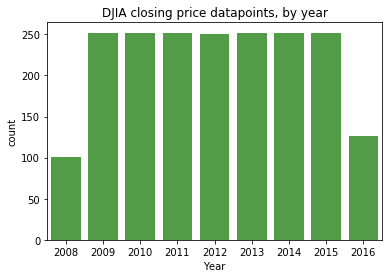

In [40]:
# Plot year value counts
ax = sns.countplot(djia['Year'], color='#47a939')
ax.set(title='DJIA closing price datapoints, by year')
plt.show()

# Explore the stock data

In [41]:
# What was the max closing price? Min closing price?
djia_max = djia['Close'].max()
djia_min = djia['Close'].min()
djia_max_date = djia['Date'][djia['Close'] == djia_max]
djia_min_date = djia['Date'][djia['Close'] == djia_min]

print(f"The maximum closing price of the DJIA was {djia_max} on {djia_max_date.loc[283]}.")
print(f"The minimum closing price of the DJIA was {djia_min} on {djia_min_date.loc[1843]}.")

The maximum closing price of the DJIA was 18312.390625 on 2015-05-19 00:00:00.
The minimum closing price of the DJIA was 6547.049805 on 2009-03-09 00:00:00.


In [42]:
# Number of days above average and below average each year
djia_mean = djia['Close'].mean()
print(f"The mean closing price of the DJIA was {djia_mean}.")

The mean closing price of the DJIA was 13463.032254798398.


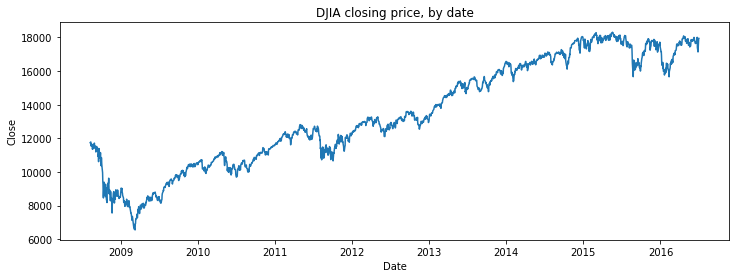

In [44]:
# How has trading volume for the Dow Jones Industrial Average (DJIA) changed over time?
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.lineplot(x="Date", y="Close", ax=ax, data=djia)
ax.set(title='DJIA closing price, by date')
plt.show()
#TODO: Cleanup plot to remove space at margins, add in grids for month and year

In [ ]:
# How has the DJIA changed over time (closing price)?
# What are the main topics on days that are above mean stock price?
# What are the topics on days that are below mean stock price?